<a href="https://colab.research.google.com/github/Sal47506/ML_Psets/blob/main/ML_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# Question 1b

import numpy as np

def rand_walk(N: int) -> np.ndarray:
    size = N
    P = np.zeros(size)
    P[size//2] = 1.0   # start at the middle

    # do N steps
    for _ in range(size//2):
        P_new = np.zeros(size)
        for k in range(size):
            # contribution from left neighbor
            if k > 0:
                P_new[k] += P[k-1] / 3
            # contribution from staying
            P_new[k] += P[k] / 3
            # contribution from right neighbor
            if k < size-1:
                P_new[k] += P[k+1] / 3
        P = P_new
    return P

# Example
P_final = rand_walk(1000)
print(P_final.sum())   # should be ~1.0

print(P_final)

0.9999999999999991
[2.75025296e-239 1.37512648e-236 3.44469183e-234 5.76398015e-232
 7.24769039e-230 7.30464263e-228 6.14664183e-226 4.44160323e-224
 2.81351001e-222 1.58705783e-220 8.07155414e-219 3.73848996e-217
 1.59002498e-215 6.25312197e-214 2.28740348e-212 7.82264270e-211
 2.51219981e-209 7.60563375e-208 2.17817864e-206 5.91918677e-205
 1.53051299e-203 3.77482599e-202 8.90059964e-201 2.01045308e-199
 4.35847494e-198 9.08422135e-197 1.82322781e-195 3.52881903e-194
 6.59540639e-193 1.19185721e-191 2.08490699e-190 3.53430845e-189
 5.81195825e-188 9.28021500e-187 1.44013469e-185 2.17383556e-184
 3.19430708e-183 4.57279356e-182 6.38193321e-181 8.68926451e-180
 1.15492323e-178 1.49943541e-177 1.90265115e-176 2.36095368e-175
 2.86643139e-174 3.40674662e-173 3.96543599e-172 4.52266434e-171
 5.05639487e-170 5.54387836e-169 5.96331586e-168 6.29551955e-167
 6.52539093e-166 6.64305649e-165 6.64454317e-164 6.53193401e-163
 6.31300789e-162 6.00042678e-161 5.61058105e-160 5.16223232e-159
 4.675

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Problem 5 part a
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import random

accuracies = []
data = fetch_openml(name='dna', as_frame=False)
clf = SGDClassifier()
for i in range(200):
  indices = random.choices(range(len(data.data)), k=100)
  A = data.data[indices, :]
  clf.partial_fit(A, data.target[indices], np.unique(data.target))
  accuracy = clf.score(A, data.target[indices])
  accuracies.append(accuracy)
  print(f"Accuracy after {i+1} iteration(s): {accuracy}");




print(data.DESCR)
print(data.target)

Accuracy after 1 iteration(s): 0.94
Accuracy after 2 iteration(s): 0.95
Accuracy after 3 iteration(s): 0.95
Accuracy after 4 iteration(s): 0.99
Accuracy after 5 iteration(s): 0.94
Accuracy after 6 iteration(s): 0.98
Accuracy after 7 iteration(s): 0.98
Accuracy after 8 iteration(s): 0.99
Accuracy after 9 iteration(s): 0.93
Accuracy after 10 iteration(s): 0.99
Accuracy after 11 iteration(s): 0.94
Accuracy after 12 iteration(s): 0.95
Accuracy after 13 iteration(s): 0.96
Accuracy after 14 iteration(s): 0.98
Accuracy after 15 iteration(s): 0.98
Accuracy after 16 iteration(s): 0.99
Accuracy after 17 iteration(s): 1.0
Accuracy after 18 iteration(s): 0.99
Accuracy after 19 iteration(s): 0.95
Accuracy after 20 iteration(s): 0.97
Accuracy after 21 iteration(s): 1.0
Accuracy after 22 iteration(s): 1.0
Accuracy after 23 iteration(s): 0.97
Accuracy after 24 iteration(s): 0.98
Accuracy after 25 iteration(s): 0.99
Accuracy after 26 iteration(s): 0.98
Accuracy after 27 iteration(s): 0.99
Accuracy afte

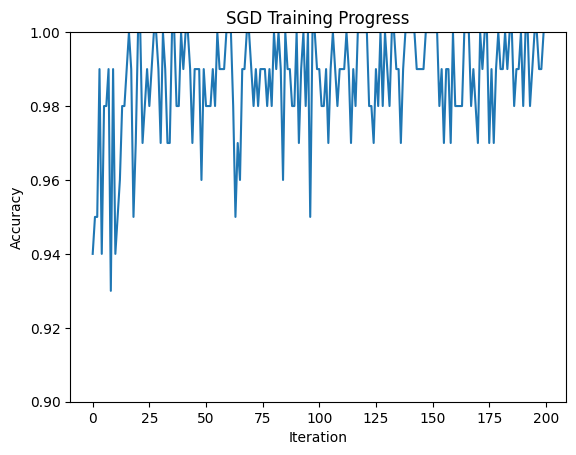

In [ ]:
# Problem 5 part a
plt.plot(accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('SGD Training Progress')
plt.ylim(0.9, 1)
plt.show()

In [ ]:
# Problem 5 part b
print("\n=== Model Parameters ===")
print("Classes:", clf.classes_)
print("Intercepts (c0 values):", clf.intercept_)

print("\nDetailed breakdown:")
for i, class_name in enumerate(clf.classes_):
    print(f"Class '{class_name}': c0 = {clf.intercept_[i]:.6f}")

print(f"\nNumber of features (d): {data.data.shape[1]}")
print(f"Shape of coefficient matrix: {clf.coef_.shape}")


=== Model Parameters ===
Classes: ['1' '2' '3']
Intercepts (c0 values): [-62.81611434 -20.51486984  23.6514054 ]

Detailed breakdown:
Class '1': c0 = -62.816114
Class '2': c0 = -20.514870
Class '3': c0 = 23.651405

Number of features (d): 180
Shape of coefficient matrix: (3, 180)
